# CS:GO Round Winner Classification

---



## Importing Data

In [ ]:
# Importing code for Kenzie

import pandas as pd
data = pd.read_csv("csgo_round_snapshots.csv")
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [ ]:
# Importing code for Adam (Google Drive)

#from google.colab import drive
#drive.mount('/content/drive')

#import os
#os.chdir('/content/drive/My Drive/2024 Spring/Big Data Analytics/Project/')

#import pandas as pd
#data = pd.read_csv("csgo_round_snapshots.csv")
#data

## Investigate distributions

In [ ]:
# Investigate distributions
print(data.isnull().sum())

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64


In [ ]:
# Find NaN values in the DataFrame
missing_values = data.isna().sum()
# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [ ]:
import numpy as np
from sklearn import preprocessing
# Separate features (X) and target variable (y)
X = data.drop(columns=['round_winner'])  # Features (all columns except 'round_winner')

# Label Encode response
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(data['round_winner'])
print(y)

# Create a new DataFrame containing only numeric columns from X
numeric_data = X.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns (float64 and int64)

[0 0 0 ... 1 1 1]


In [ ]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


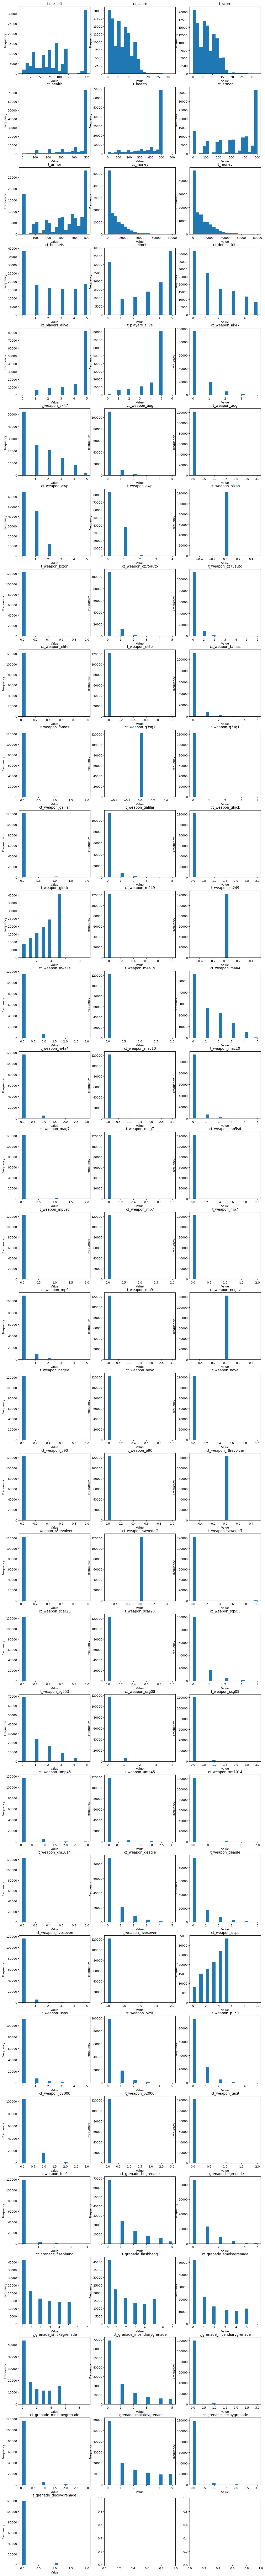

In [ ]:
import matplotlib.pyplot as plt

num_cols = 3

num_rows = (len(numeric_data.columns) + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axs = axs.flatten()

for i, column in enumerate(numeric_data.columns):
    ax = axs[i]
    ax.hist(numeric_data[column], bins=20)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

#plt.tight_layout()
#plt.show()

None of the distributions are normal there are predictors with zero variance

## Preprocessing

### Numeric Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

print("Dimensions before handling NZV: ", numeric_data.shape)

selector = VarianceThreshold(threshold=0.1)

numeric_data_transformed = selector.fit_transform(numeric_data)

selected_features_indices = selector.get_support(indices=True)

selected_features_names = numeric_data.columns[selected_features_indices]

print("Features with NZV: ")
print(selected_features_names)

numeric_data_transformed_df = pd.DataFrame(numeric_data_transformed, columns=selected_features_names)

print("Dimensions After handling NZV:", numeric_data_transformed_df.shape)


Dimensions before handling NZV:  (122410, 94)
Features with NZV: 
Index(['time_left', 'ct_score', 't_score', 'ct_health', 't_health', 'ct_armor',
       't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets',
       'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 'ct_weapon_awp',
       't_weapon_awp', 'ct_weapon_cz75auto', 't_weapon_cz75auto',
       'ct_weapon_famas', 't_weapon_galilar', 't_weapon_glock',
       'ct_weapon_m4a4', 't_weapon_mac10', 'ct_weapon_mp9', 'ct_weapon_sg553',
       't_weapon_sg553', 'ct_weapon_deagle', 't_weapon_deagle',
       'ct_weapon_usps', 't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250',
       'ct_weapon_p2000', 'ct_grenade_hegrenade', 't_grenade_hegrenade',
       'ct_grenade_flashbang', 't_grenade_flashbang',
       'ct_grenade_smokegrenade', 't_grenade_smokegrenade',
       'ct_grenade_incendiarygrenade', 't_grenade_molotovgrenade'],
      dtype='object')
Dimensions After ha

This Removes Weapons that are barely used amongst snapshots as well as certain grenades that dont have much affect on game play

### Correlation


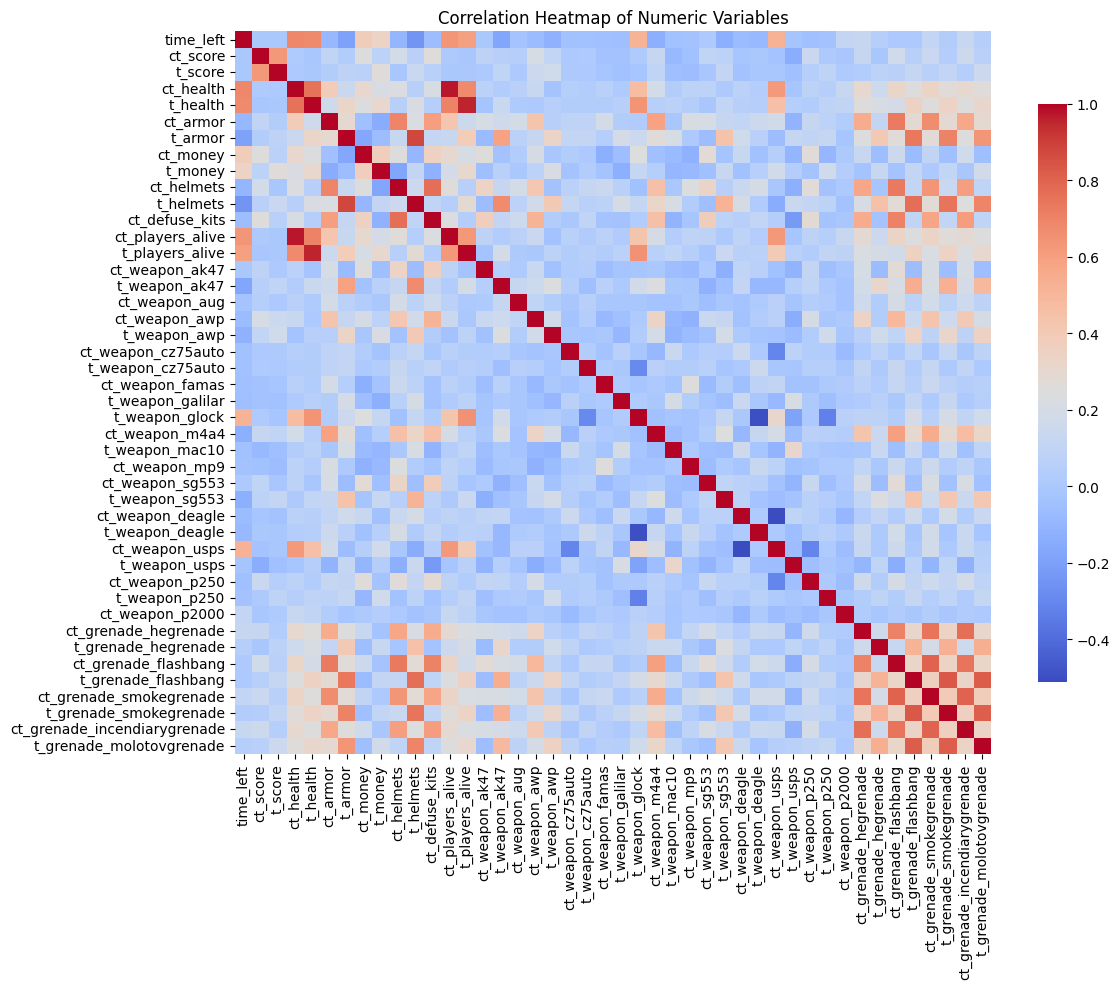

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = numeric_data_transformed_df.corr()

# Increase figure size and adjust font size
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": 0.8})

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Add title
plt.title('Correlation Heatmap of Numeric Variables')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
threshold = 0.85

high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        if abs(corr.iloc[i, j]) >= threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
        if abs(corr.iloc[i, j]) <= -threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

print("Highly correlated pairs with correlation >= 0.85:")
for pair in high_corr_pairs:
    print(pair)

columns_to_drop = []
for pair in high_corr_pairs:
    columns_to_drop.append(pair[1])

numeric_data_filtered = numeric_data_transformed_df.drop(columns=columns_to_drop, axis=1)

# Print dimensions before and after removing highly correlated features
print("\nDimensions before removing highly correlated features:", numeric_data_transformed_df.shape)
print("Dimensions after removing highly correlated features:", numeric_data_filtered.shape)


Highly correlated pairs with correlation >= 0.85:
('ct_health', 'ct_players_alive', 0.97162955529529)
('t_health', 't_players_alive', 0.9558592459689307)
('t_armor', 't_helmets', 0.8776262288968145)

Dimensions before removing highly correlated features: (122410, 44)
Dimensions after removing highly correlated features: (122410, 41)


### Skewness

In [ ]:
# Calculate skewness for each column
skewness = numeric_data_filtered.skew()

skewness_sorted = skewness.sort_values(ascending=False)

print("Skewness statistic for each column (in descending order):")
for column, skew_value in skewness_sorted.items():
    print(f"{column}: {skew_value:.2f}")

print("\nSkewness stats for columns with skewness >= 1 or <= -1:")
for column, skew_value in skewness.items():
    if skew_value >= 1 or skew_value <= -1:
        print(f"{column}: {skew_value:.2f}")


Skewness statistic for each column (in descending order):
t_weapon_mac10: 4.68
t_weapon_galilar: 4.52
ct_weapon_aug: 4.44
t_weapon_cz75auto: 4.37
t_weapon_usps: 4.32
ct_weapon_famas: 4.20
ct_weapon_mp9: 3.85
ct_weapon_cz75auto: 3.50
t_weapon_deagle: 2.59
ct_weapon_sg553: 2.57
ct_weapon_p250: 2.52
ct_weapon_p2000: 2.47
ct_weapon_ak47: 2.30
t_weapon_p250: 2.22
ct_weapon_deagle: 2.19
t_grenade_hegrenade: 2.14
ct_money: 1.85
t_money: 1.57
ct_grenade_hegrenade: 1.43
ct_grenade_incendiarygrenade: 1.42
t_weapon_sg553: 1.31
t_grenade_molotovgrenade: 0.96
t_weapon_awp: 0.90
ct_weapon_m4a4: 0.87
t_weapon_ak47: 0.83
ct_grenade_smokegrenade: 0.80
ct_weapon_awp: 0.80
t_grenade_smokegrenade: 0.71
ct_defuse_kits: 0.68
t_grenade_flashbang: 0.52
ct_score: 0.51
ct_grenade_flashbang: 0.49
t_score: 0.48
ct_helmets: 0.32
time_left: 0.16
ct_weapon_usps: -0.46
t_armor: -0.48
ct_armor: -0.53
t_weapon_glock: -0.59
t_health: -1.30
ct_health: -1.36

Skewness stats for columns with skewness >= 1 or <= -1:
ct_heal

In [ ]:
from scipy import stats
import numpy as np

# Ensure all values are positive
numeric_data_filtered = numeric_data_filtered.apply(lambda x: x - x.min() + 1 if x.min() <= 0 else x)

# Apply Box-Cox transformation to all numeric predictors
for column in numeric_data_filtered.columns:
    transformed_data, _ = stats.boxcox(numeric_data_filtered[column])
    numeric_data_filtered[column] = transformed_data

# Recalculate skewness after transformation
skewness_after_transform = numeric_data_filtered.skew()

print("\nSkewness after transformation:")
print(skewness_after_transform)

print("\nSkewness stats for columns with skewness >= 1 or <= -1  after Transformation:")
for column, skew_value in skewness_after_transform.items():
    if skew_value >= 1 or skew_value <= -1:
        print(f"{column}: {skew_value:.2f}")



Skewness after transformation:
time_left                      -0.177696
ct_score                       -0.134562
t_score                        -0.142608
ct_health                      -0.866811
t_health                       -0.895111
ct_armor                       -0.810517
t_armor                        -0.845574
ct_money                       -0.087064
t_money                        -0.109815
ct_helmets                     -0.077668
ct_defuse_kits                  0.021753
ct_weapon_ak47                  1.401743
t_weapon_ak47                   0.103614
ct_weapon_aug                   2.653600
ct_weapon_awp                   0.225269
t_weapon_awp                    0.788655
ct_weapon_cz75auto              2.292919
t_weapon_cz75auto               2.953944
ct_weapon_famas                 2.915343
t_weapon_galilar                3.001447
t_weapon_glock                 -0.363143
ct_weapon_m4a4                  0.143462
t_weapon_mac10                  3.142199
ct_weapon_mp9            

There is a significant decrease in skewness, keep transformation

### Outliers

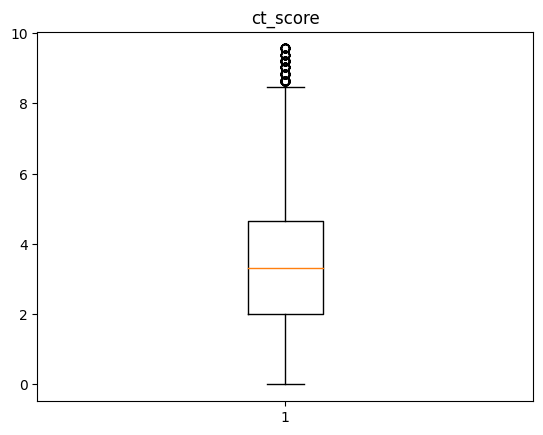

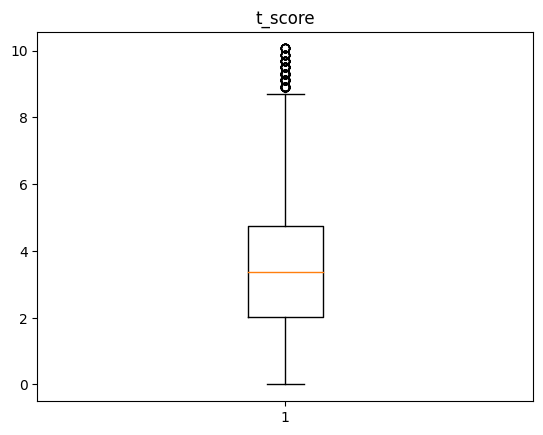

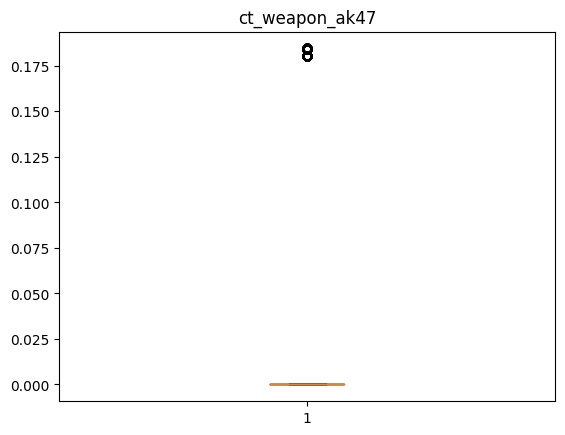

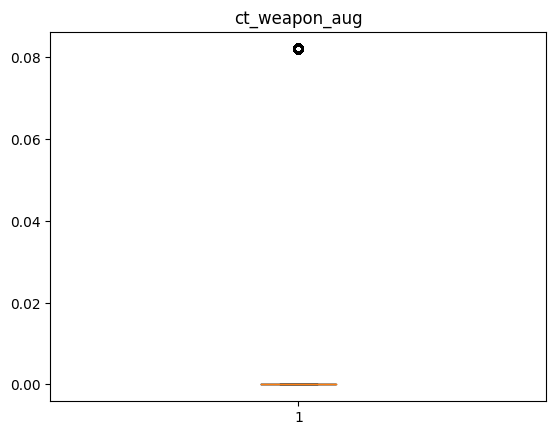

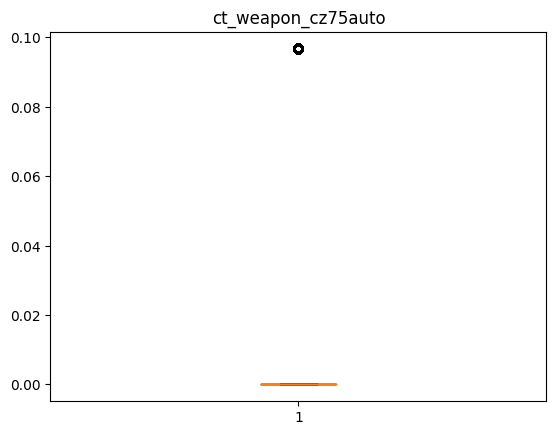

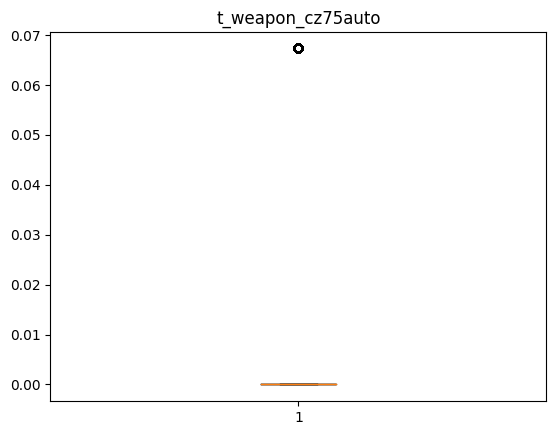

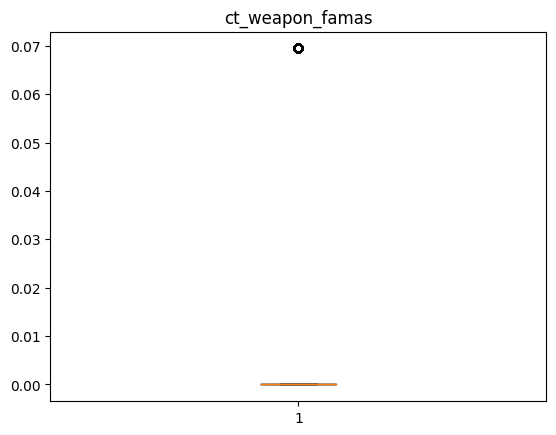

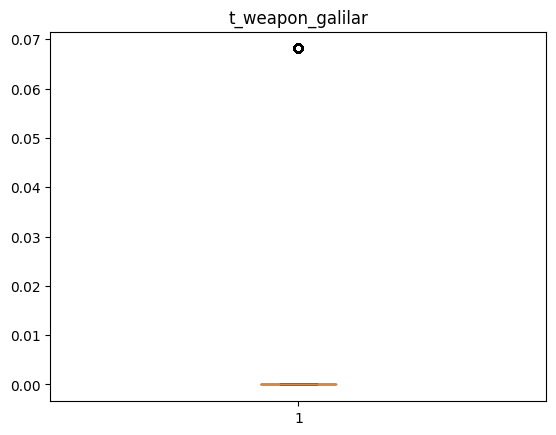

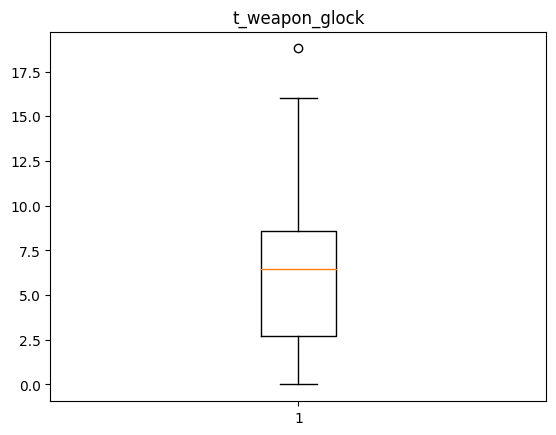

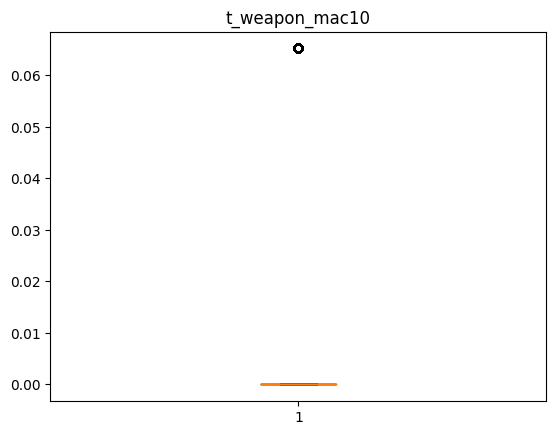

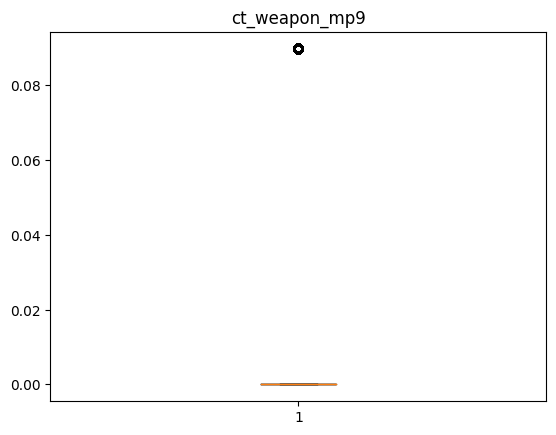

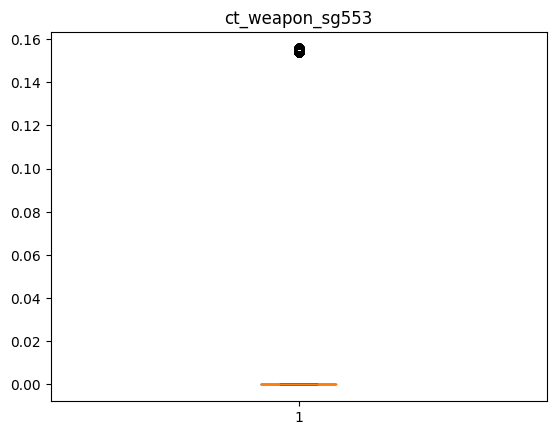

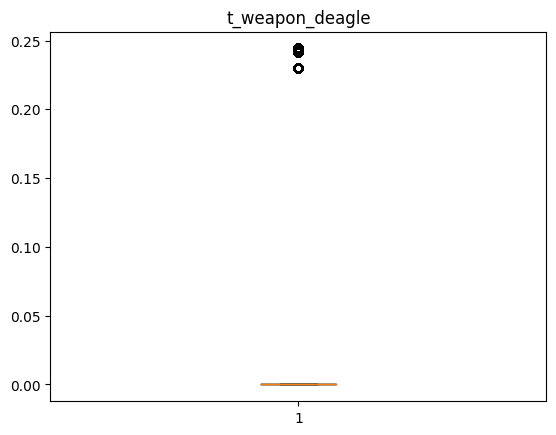

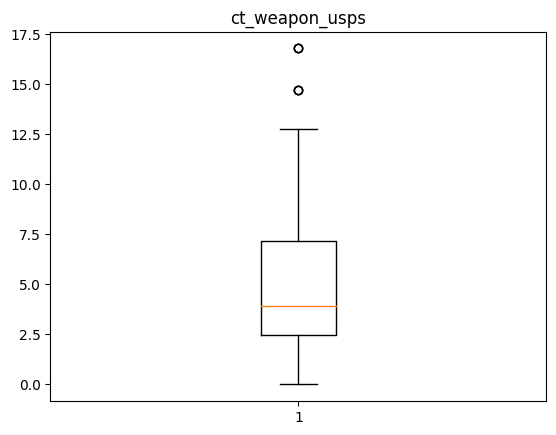

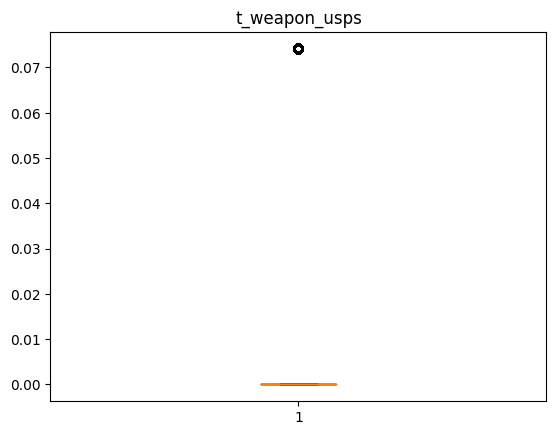

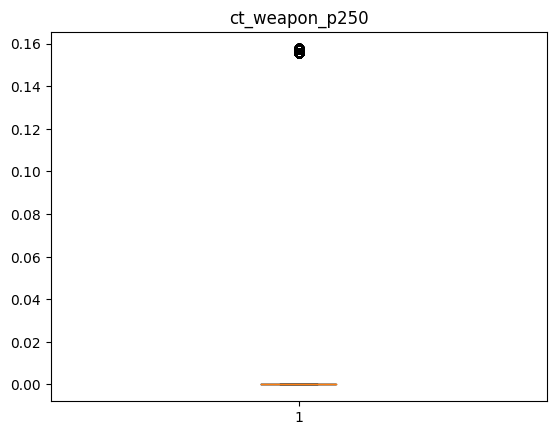

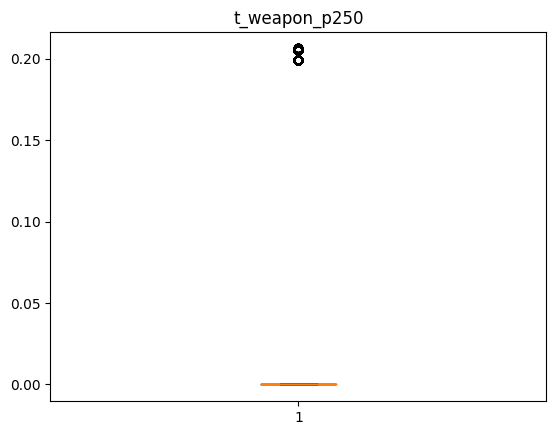

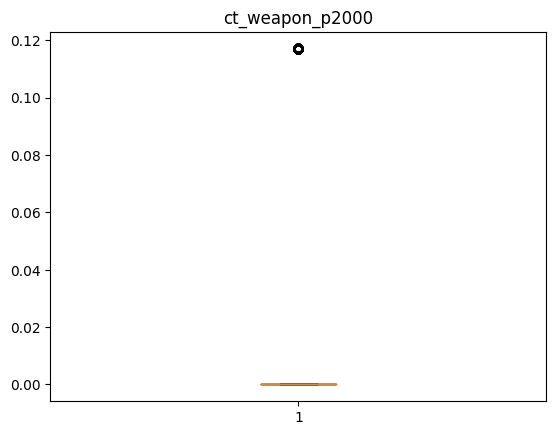

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def count_outliers_for_each_predictor(data, threshold_iqr=1.5):
    outliers_count_dict = {}

    for column in data.columns:
        # IQR Method
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        # Find indices of outliers
        outliers_indices = np.where((data[column] < lower_fence) | (data[column] > upper_fence))

        # Count outliers
        outliers_count = len(outliers_indices[0])

        outliers_count_dict[column] = outliers_count

    return outliers_count_dict

outliers_count = count_outliers_for_each_predictor(numeric_data_filtered)

# Filter predictors with non-zero outliers count
predictors_with_outliers = {predictor: count for predictor, count in outliers_count.items() if count > 0}

# Plot boxplots for predictors with non-zero outliers count
for predictor in predictors_with_outliers:
    plt.figure()
    plt.title(predictor)
    plt.boxplot(numeric_data_filtered[predictor])
    plt.show()


In [ ]:
from sklearn.preprocessing import Normalizer
import pandas as pd
from scipy.stats.mstats import winsorize
from scipy.stats import median_abs_deviation

def detect_outliers(data, threshold_iqr=1.5, threshold_mad=3.5):
    # IQR Method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold_iqr * IQR
    upper_bound = Q3 + threshold_iqr * IQR
    outliers_iqr = data[((data < lower_bound) | (data > upper_bound)).any(axis=1)]

    return outliers_iqr

# before winsorization
outliers_before_iqr = detect_outliers(numeric_data_filtered)

print("Before Winsorization:")
print("Number of outliers detected using IQR method:", len(outliers_before_iqr))

# winsorization
numeric_winsorized = numeric_data_filtered.copy()
for column in numeric_data_filtered.columns:
    numeric_winsorized[column] = winsorize(numeric_winsorized[column], limits=[0.1, 0.1])

# after winsorization
outliers_after_iqr = detect_outliers(numeric_winsorized)
print("\nAfter Winsorization:")
print("Number of outliers detected using IQR method:", len(outliers_after_iqr))


Before Winsorization:
Number of outliers detected using IQR method: 105014


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



After Winsorization:
Number of outliers detected using IQR method: 98284


In [ ]:
outliers_count = count_outliers_for_each_predictor(numeric_winsorized)

for predictor, count in outliers_count.items():
    print("Predictor:", predictor, "- Number of outliers:", count)


Predictor: time_left - Number of outliers: 0
Predictor: ct_score - Number of outliers: 0
Predictor: t_score - Number of outliers: 0
Predictor: ct_health - Number of outliers: 0
Predictor: t_health - Number of outliers: 0
Predictor: ct_armor - Number of outliers: 0
Predictor: t_armor - Number of outliers: 0
Predictor: ct_money - Number of outliers: 0
Predictor: t_money - Number of outliers: 0
Predictor: ct_helmets - Number of outliers: 0
Predictor: ct_defuse_kits - Number of outliers: 0
Predictor: ct_weapon_ak47 - Number of outliers: 26084
Predictor: t_weapon_ak47 - Number of outliers: 0
Predictor: ct_weapon_aug - Number of outliers: 12328
Predictor: ct_weapon_awp - Number of outliers: 0
Predictor: t_weapon_awp - Number of outliers: 0
Predictor: ct_weapon_cz75auto - Number of outliers: 15081
Predictor: t_weapon_cz75auto - Number of outliers: 0
Predictor: ct_weapon_famas - Number of outliers: 0
Predictor: t_weapon_galilar - Number of outliers: 0
Predictor: t_weapon_glock - Number of outl

### Categorical Features

In [ ]:
# Investigate Categorical Variables
categorical_data = data[['bomb_planted', 'map']]
data.select_dtypes(include=['object','bool'])

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


In [ ]:
data['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [ ]:
data['bomb_planted'].unique()

array([False,  True])

In [ ]:
counts = categorical_data['bomb_planted'].value_counts() # Calculate percentages
percentages = (counts / len(categorical_data)) * 100

# Print percentages
print(percentages)

bomb_planted
False    88.821175
True     11.178825
Name: count, dtype: float64


In [ ]:
counts = categorical_data['map'].value_counts()# Calculate percentages
percentages = (counts / len(categorical_data)) * 100

# Print percentages
print(percentages)

map
de_inferno     19.451842
de_dust2       18.090025
de_nuke        15.542031
de_mirage      15.175231
de_overpass    11.503145
de_train       11.021158
de_vertigo      9.098113
de_cache        0.118454
Name: count, dtype: float64


No Degenerate distributions


### Encoding of Categorical Variables

In [ ]:
# One Hot Map
categorical_data = pd.get_dummies(categorical_data,columns=['map'],prefix=['map'])

In [ ]:
# 1 0 encoding bomb planted
categorical_data['bomb_planted'] =  categorical_data['bomb_planted'].astype(np.int16)

## Combine Data into 1 Data Frame

In [ ]:
X = pd.concat([categorical_data, numeric_winsorized], axis=1)
X.head(20)

,bomb_planted,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,time_left,...,t_weapon_p250,ct_weapon_p2000,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_molotovgrenade
0,0,False,True,False,False,False,False,False,False,42.082449,...,0.0,0.116807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,False,True,False,False,False,False,False,False,38.969880,...,0.0,0.116807,0.000000,0.000000,0.000000,0.000000,0.000000,0.917457,0.000000,0.000000
2,0,False,True,False,False,False,False,False,False,28.054635,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.917457,0.000000,0.000000
3,0,False,True,False,False,False,False,False,False,23.905402,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,False,True,False,False,False,False,False,False,42.082449,...,0.0,0.116807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,False,True,False,False,False,False,False,False,31.709096,...,0.0,0.116807,0.689466,0.000000,1.437858,0.000000,1.097255,0.000000,0.478629,0.000000
6,0,False,True,False,False,False,False,False,False,27.842920,...,0.0,0.116807,0.000000,0.000000,1.130831,0.000000,0.615149,0.000000,0.000000,0.000000
7,0,False,True,False,False,False,False,False,False,23.675359,...,0.0,0.116807,0.000000,0.000000,1.130831,0.000000,0.615149,0.000000,0.000000,0.000000
8,0,False,True,False,False,False,False,False,False,19.089651,...,0.0,0.116807,0.000000,0.000000,1.130831,0.000000,0.615149,0.000000,0.000000,0.000000
9,0,False,True,False,False,False,False,False,False,42.082449,...,0.0,0.116807,0.000000,0.000000,0.705882,0.000000,0.615149,0.000000,0.000000,0.000000


In [ ]:
X.shape

(122410, 50)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,train_size=0.8,shuffle=True)

## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.80)
pca.fit(X_train)

In [ ]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

threshold = 0.80

num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

print("Number of components to explain at least", threshold * 100, "% variance:", num_components)

In [ ]:
#X_train_PCA = pca.transform(X_train)
#X_test_PCA = pca.transform(X_test)

# Model Training

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

def train_model(model, grid, x, y):
    cv = KFold(n_splits = 5)
    scoring = {'accuracy': 'accuracy',
               'precision': 'precision_macro',
               'recall': 'recall_macro',
               'f1': 'f1_macro'}
    grid_search = GridSearchCV(estimator=model, param_grid=grid,
                               n_jobs=-1, cv=cv, scoring=scoring,
                               refit='accuracy', error_score=0)
    grid_result = grid_search.fit(x, y)
    # summarize results
    print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    print("Best Precision: %f" % grid_result.cv_results_['mean_test_precision'][grid_result.best_index_])
    print("Best Recall: %f" % grid_result.cv_results_['mean_test_recall'][grid_result.best_index_])
    print("Best F1-score: %f" % grid_result.cv_results_['mean_test_f1'][grid_result.best_index_])
    means = grid_result.cv_results_['mean_test_accuracy']
    stds = grid_result.cv_results_['std_test_accuracy']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Accuracy: %f (%f) with: %r" % (mean, stdev, param))
    return

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
LRmodel = LogisticRegression()
grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
train_model(LRmodel, grid, X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors
KNNmodel = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
train_model(KNNmodel, grid, X_train, y_train)

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier
NNetmodel = MLPClassifier()
hidden_layer_sizes = [(100,), (50, 50), (50, 50, 50)]
activation = ['logistic', 'tanh', 'relu']
solver = ['adam']
alpha = [0.0001, 0.001, 0.01]
# define grid search
grid = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha)
train_model(NNetmodel, grid, X_train, y_train)

Best Accuracy: 0.793669 using {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
Best Precision: 0.740964
Best Recall: 0.740874
Best F1-score: 0.740829
Accuracy: 0.787905 (0.000773) with: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Accuracy: 0.773091 (0.001178) with: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Accuracy: 0.772750 (0.002191) with: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
Accuracy: 0.786699 (0.002964) with: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Accuracy: 0.771618 (0.002123) with: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Accuracy: 0.770316 (0.002402) with: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
Accuracy: 0.782377 (0.0025

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# SVM
from sklearn.svm import SVC
# define model and parameters
SVMmodel = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
train_model(SVMmodel, grid, X_train, y_train)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
train_model(NBmodel, {}, X_train, y_train)

Best Accuracy: 0.706938 using {}
Best Precision: 0.707044
Best Recall: 0.706419
Best F1-score: 0.706467
Accuracy: 0.706938 (0.003107) with: {}


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()
# define grid search
grid = dict(max_depth=[None,1,2,3], min_samples_leaf=[2,3,4] )
train_model(DTmodel, grid, X_train, y_train)

Best Accuracy: 0.789600 using {'max_depth': None, 'min_samples_leaf': 2}
Best Precision: 0.790157
Best Recall: 0.790039
Best F1-score: 0.789593
Accuracy: 0.789600 (0.003182) with: {'max_depth': None, 'min_samples_leaf': 2}
Accuracy: 0.784730 (0.002025) with: {'max_depth': None, 'min_samples_leaf': 3}
Accuracy: 0.781595 (0.001767) with: {'max_depth': None, 'min_samples_leaf': 4}
Accuracy: 0.642891 (0.001497) with: {'max_depth': 1, 'min_samples_leaf': 2}
Accuracy: 0.642891 (0.001497) with: {'max_depth': 1, 'min_samples_leaf': 3}
Accuracy: 0.642891 (0.001497) with: {'max_depth': 1, 'min_samples_leaf': 4}
Accuracy: 0.677549 (0.003567) with: {'max_depth': 2, 'min_samples_leaf': 2}
Accuracy: 0.677549 (0.003567) with: {'max_depth': 2, 'min_samples_leaf': 3}
Accuracy: 0.677549 (0.003567) with: {'max_depth': 2, 'min_samples_leaf': 4}
Accuracy: 0.700229 (0.002473) with: {'max_depth': 3, 'min_samples_leaf': 2}
Accuracy: 0.700229 (0.002473) with: {'max_depth': 3, 'min_samples_leaf': 3}
Accuracy: 0

## The Top 2 models were:
* KNN
  * Training Accuracy: 0.886
  * Training F1: 0.886
* Decision Tree
  * Training Accuracy:  0.790
  * Training F1: 0.790
  * Parameters: Max-Depth: None, Min_Samples_Leaf: 2



# Model Validation

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score

KNNmodel = KNeighborsClassifier()

cv = KFold(n_splits=5)

scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro'}

n_neighbors = range(1, 21,2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=grid,
                           n_jobs=-1, cv=cv, scoring=scoring,
                           refit='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

best_params = grid_result.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
best_params = {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
knn_model = KNeighborsClassifier(**best_params)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.9009067886610571


In [ ]:
from sklearn.metrics import f1_score

print("Best Parameters: ",best_params)
print("f1 score: ", f1_score(y_test, y_pred, average='micro'));


Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
f1 score:  0.9009067886610571


In [ ]:
# Decision Tree
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


cv = KFold(n_splits=5)
DTmodel = DecisionTreeClassifier()
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro'}
# define grid search
grid = dict(max_depth=[None,1,2,3], min_samples_leaf=[2,3,4] )
grid_search = GridSearchCV(estimator=DTmodel, param_grid=grid,
                           n_jobs=-1, cv=cv, scoring=scoring,
                           refit='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)
best_params = grid_result.best_params_
DT_model = DecisionTreeClassifier(**best_params)

DT_model.fit(X_train, y_train)

y_pred = DT_model.predict(X_test)

Accuracy on the test set: 0.8038150477902132
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2}


NameError: name 'f1_score' is not defined

In [ ]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)
print("Best Parameters: ", best_params)
print("f1 score: ", f1_score(y_test, y_pred, average=None))
print("f1 score: ",f1_score(y_test, y_pred, average='micro'))

Accuracy on the test set: 0.8038150477902132
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2}
f1 score:  [0.80585311 0.80173375]
f1 score:  0.8038150477902132


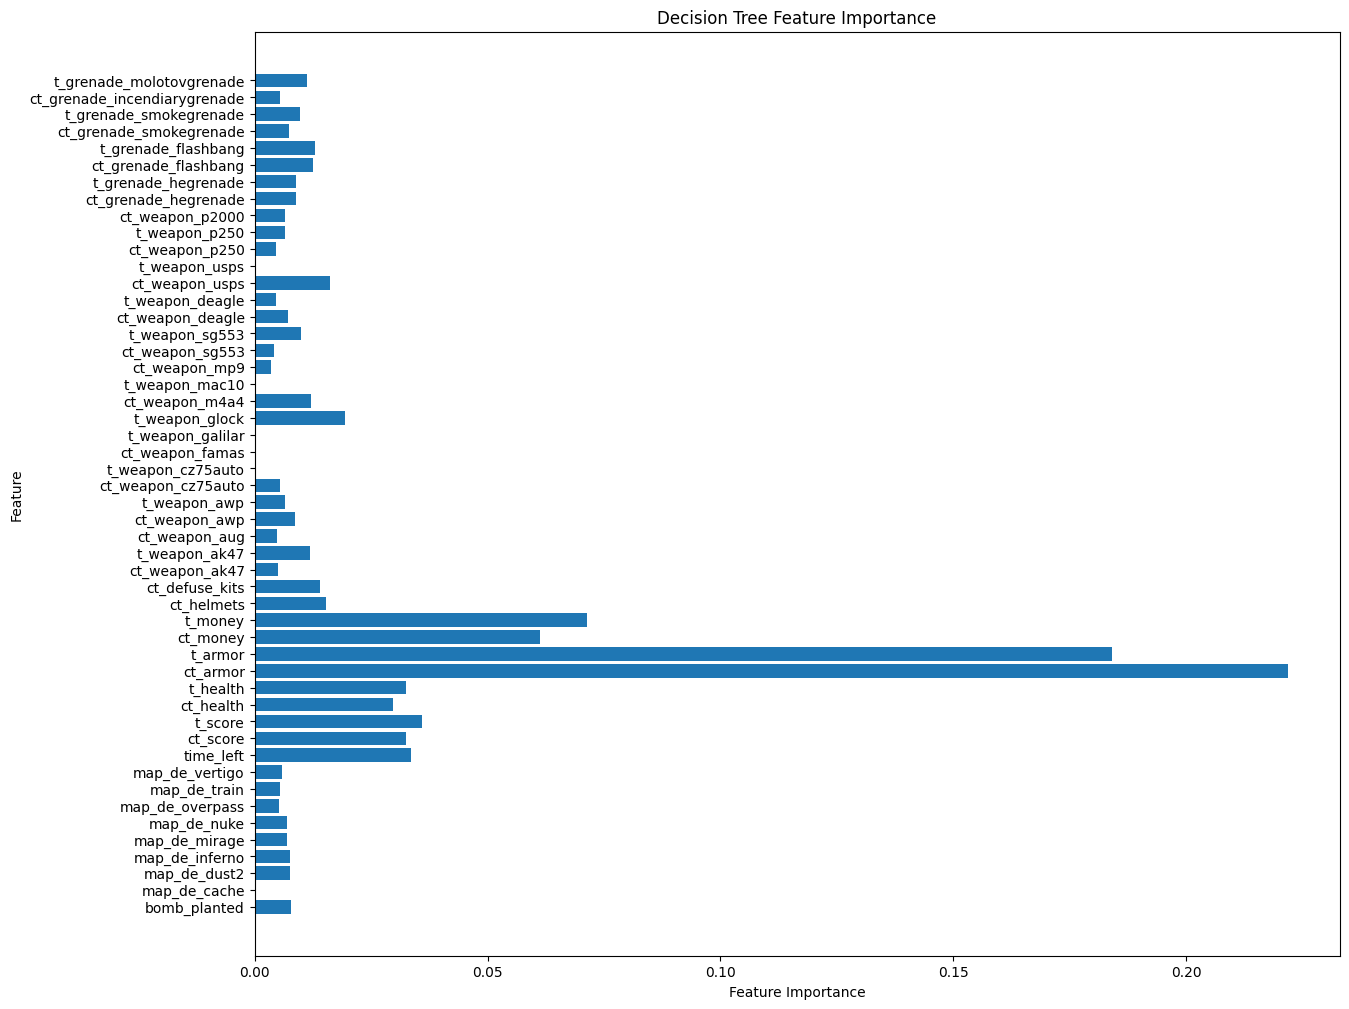

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = DT_model.feature_importances_

# Get feature names from the DataFrame X
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(14, 12))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()


# Model with Best Performance on the Test Set

* KNN
  * Test Accuracy:  0.9028265664569888
  * Test F1: 0.9028265664569888
  * Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
